In [ ]:
!pip install patool --quiet

import os, warnings

warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf

import os, patoolib, urllib

In [ ]:
urli = "https://github.com/dicodingacademy/assets/releases/download/release/"

dataset = "rockpaperscissors.zip"

urllib.request.urlretrieve(os.path.join(urli, dataset), dataset)

In [ ]:
content = "/content/rockpaperscissors.zip"

patoolib.extract_archive(content)

In [5]:
rooter = "/content/rockpaperscissors/rockpaperscissors/rps-cv-images"

os.listdir(rooter)

['README_rpc-cv-images.txt', 'rock', 'scissors', 'paper']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rescale = 1.0 / 255.0; input_image = (150, 150)

class_label = "categorical"; batches = 18

validation_split = 0.4

creator = ImageDataGenerator(
  rescale = rescale,
  rotation_range = 20,
  zoom_range = 0.2,
  shear_range = 0.2,
  fill_mode = "nearest",
  validation_split = validation_split
)

train = creator.flow_from_directory(
  rooter,
  target_size = input_image,
  batch_size = batches,
  class_mode = class_label,
  subset = "training"
)

In [7]:
train.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [8]:
label = list(train.class_indices.keys())

label

['paper', 'rock', 'scissors']

In [9]:
train.num_batches

73

In [ ]:
validation = creator.flow_from_directory(
  rooter,
  target_size = input_image,
  batch_size = batches,
  class_mode = class_label,
  subset = "validation"
)

In [11]:
from tensorflow.keras.models import Sequential

input_shape = (150, 150, 3)

from tensorflow.keras.layers import Conv2D, MaxPool2D

from tensorflow.keras.layers import Dropout, Flatten, Dense

model = Sequential([
  Conv2D(16, 3, activation="relu", padding="same", input_shape=input_shape),
  MaxPool2D((2, 2)),
  Conv2D(32, 3, activation="relu", padding="same"),
  MaxPool2D((2, 2)),
  Conv2D(64, 3, activation="relu", padding="same"),
  MaxPool2D((2, 2)),
  Conv2D(128, 3, activation="relu", padding="same"),
  MaxPool2D((2, 2)),
  Dropout(0.3),
  Flatten(),
  Dense(128, activation="relu"),
  Dense(3, activation="softmax")
])

In [12]:
loss = "categorical_crossentropy"

model.compile(optimizer="adam", loss=loss, metrics=["accuracy"])

In [13]:
from tensorflow.keras.callbacks import Callback, EarlyStopping

class Matrit(Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs.get("accuracy") >= 0.95 and logs.get("val_accuracy") >= 0.95:
      self.model.stop_training = True

callbacks = Matrit()

stopper = EarlyStopping(monitor="val_loss", patience=3)

In [ ]:
epochs = 19

monitor = [callbacks, stopper]

plot = model.fit(train, validation_data=validation, epochs=epochs, callbacks=monitor)

In [15]:
model.evaluate(train, verbose=0)

[0.07641618698835373, 0.9764078855514526]

In [16]:
model.evaluate(validation, verbose=0)

[0.1003255620598793, 0.9691075682640076]

In [17]:
import tensorflow.keras.utils as utils

import os

tester = "/content/rockpaperscissors/rockpaperscissors/rock/00nKV8oHuTGi20gq.png"

i = utils.load_img(tester, target_size=(150, 150))

i = utils.img_to_array(i)

i = tf.expand_dims(i, axis=0)

i = tf.cast(i / 255.0, tf.float32)

result = model.predict(i, verbose=0)[0]

result = label[result.argmax()]

result

'rock'

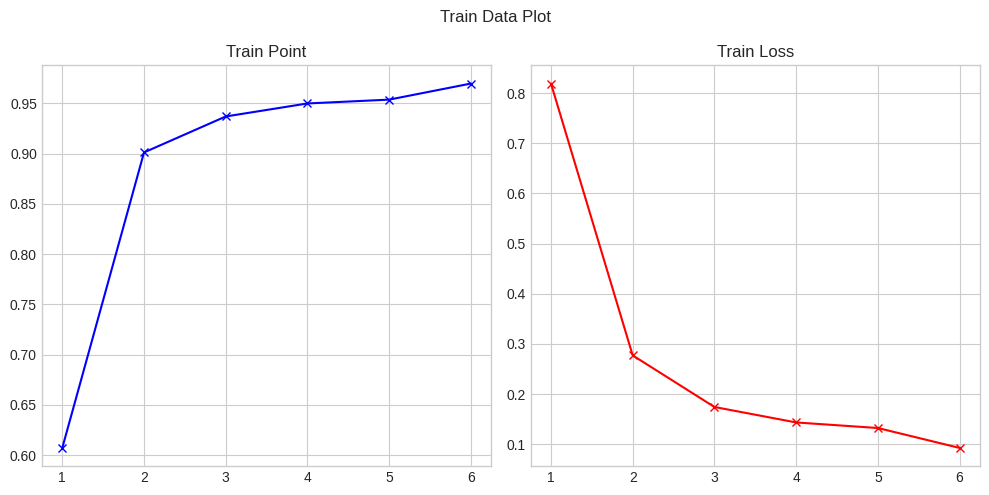

In [18]:
plot = Helplot(plot)

plot.trainplot

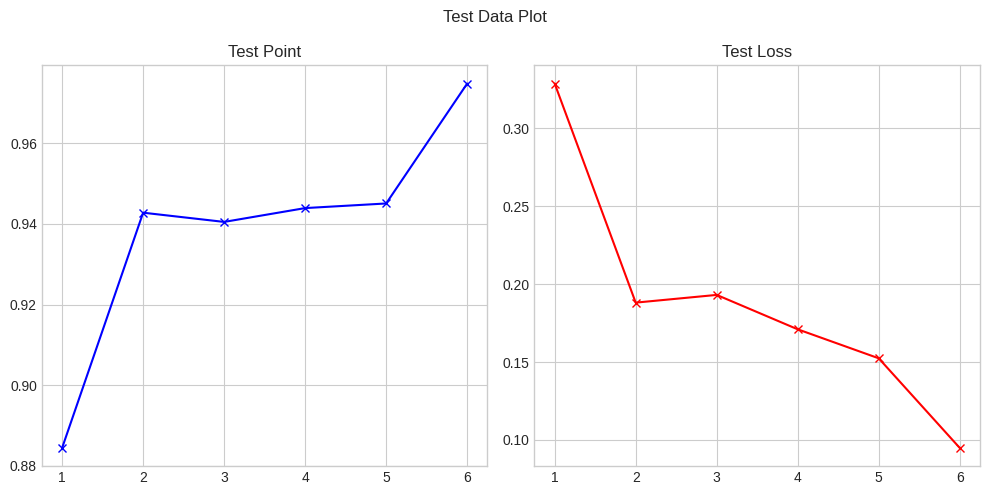

In [19]:
plot.testiplot

In [ ]:
import os

molder = "/content/model"

model.export(molder)

In [21]:
import tensorflow as tf

tflite = tf.lite.TFLiteConverter

tflite_model = tflite.from_saved_model(molder)

In [22]:
optim = [tf.lite.Optimize.DEFAULT]

tflite_model.optimizations = optim

In [23]:
import pathlib

tflite_model = tflite_model.convert()

tflite_model_file = pathlib.Path("modelite.tflite")

tflite_model_file.write_bytes(tflite_model)

1437456

In [24]:
meta = lambda filepath : os.path.getsize(filepath) / float(2**20)

round(meta("/content/modelite.tflite"), 3)

1.371

In [25]:
interpreter = tf.lite.Interpreter(model_path="/content/modelite.tflite")

interpreter.get_signature_list()

{'serving_default': {'inputs': ['keras_tensor'], 'outputs': ['output_0']}}

In [26]:
clasilite = interpreter.get_signature_runner('serving_default')

clasilite

In [27]:
paper = "/content/rockpaperscissors/rockpaperscissors/paper"

patest = os.path.join(paper, os.listdir(paper)[0])

patest

'/content/rockpaperscissors/rockpaperscissors/paper/jAh36hlZLpECSBHp.png'

In [28]:
i = utils.load_img(patest, target_size=(150, 150))

i = utils.img_to_array(i)

i = tf.expand_dims(i, axis=0)

i = tf.cast(i / 255.0, tf.float32)

reclat = clasilite(keras_tensor=i)['output_0']

reclat

array([[9.8943055e-01, 1.0150273e-02, 4.1918043e-04]], dtype=float32)

In [29]:
label[tf.math.argmax(reclat[0])]

'paper'